In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('framingham.csv')
print(df.shape)
df.head()

(4240, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [2]:
df = df.dropna(how = 'any', axis = 0)
print(df.shape)
df.head()

(3658, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


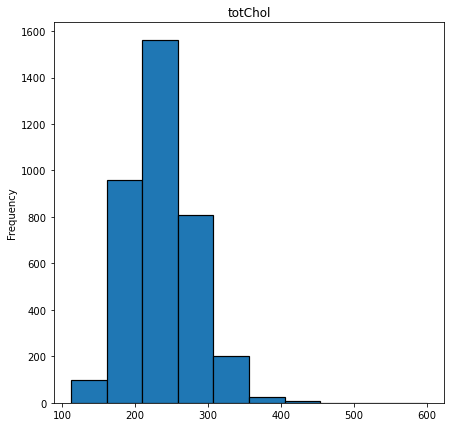

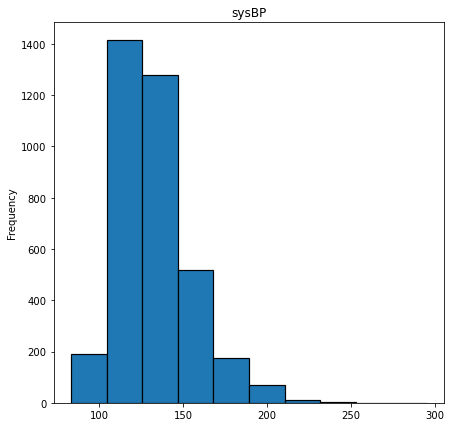

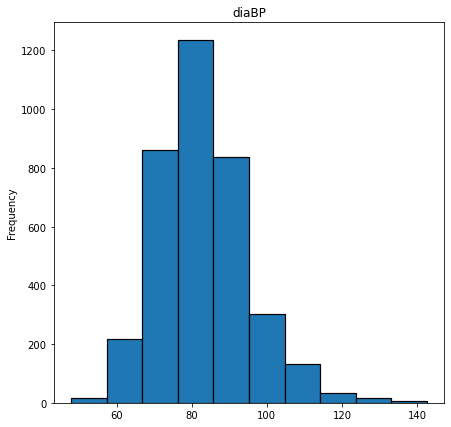

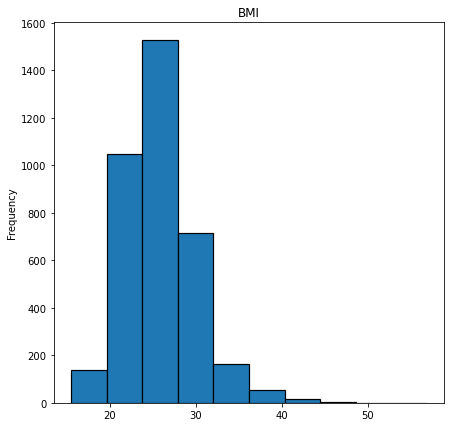

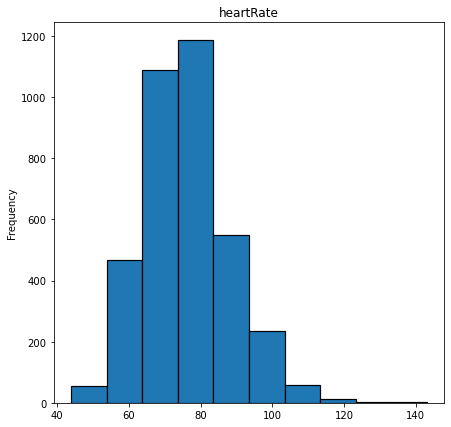

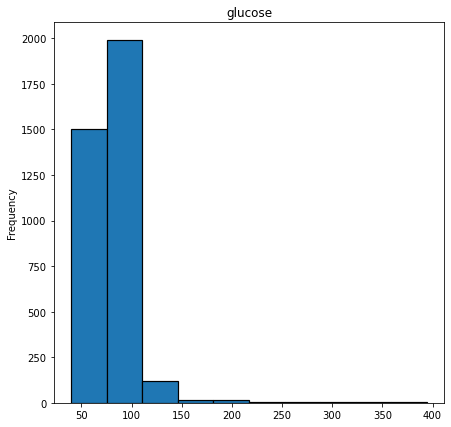

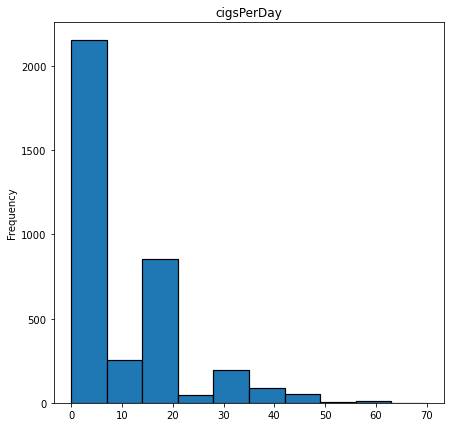

In [3]:
num_var = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'cigsPerDay']
df_num = df[num_var]

for i in df_num.columns:
    fig = plt.figure(figsize = (7,7))
    ax = fig.gca()
    df_num[i].plot.hist(ax = ax, edgecolor='black', linewidth=1.2)
    ax.set_title(i)
    plt.show()

totChol


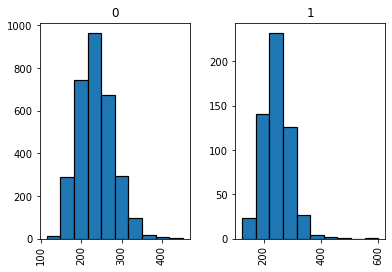

sysBP


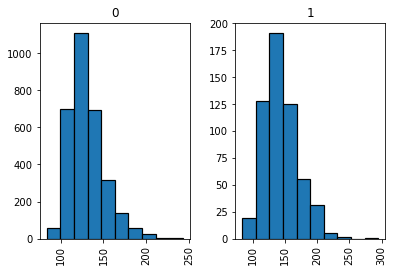

diaBP


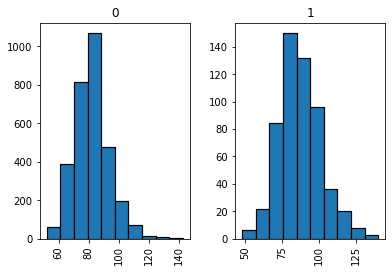

BMI


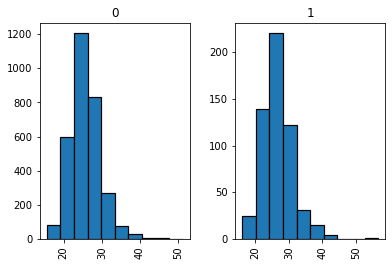

heartRate


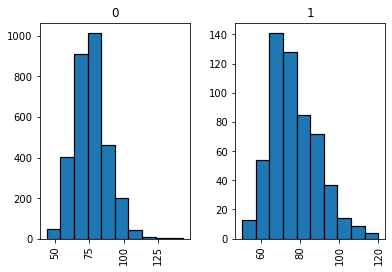

glucose


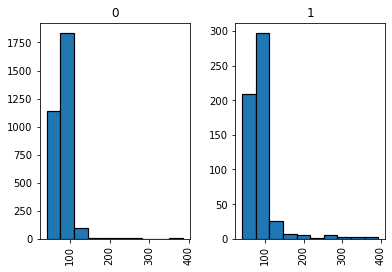

cigsPerDay


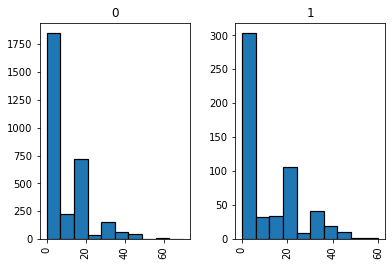

In [4]:
for i in df_num.columns:
    print(i)
    df_num[i].hist(by = df['TenYearCHD'], edgecolor='black', linewidth=1.2)
    plt.show()

##### ** There seems to be no distinguishing pattern, except the frequencies of patients who get CHD and Patients who do not – Even this is owed to the class imbalance that is present in the Datatset. 


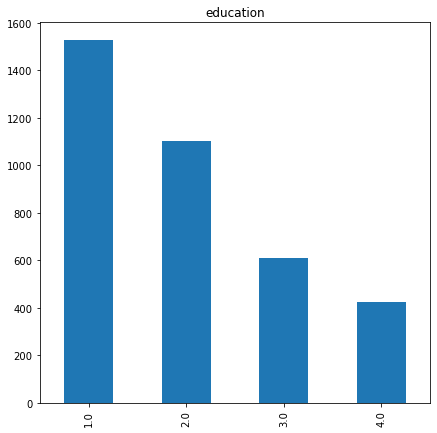

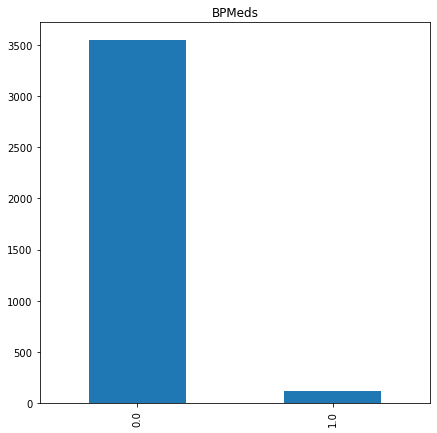

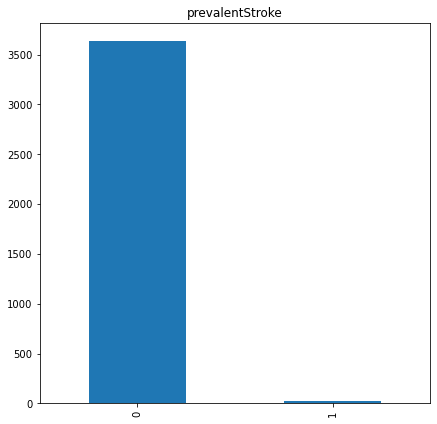

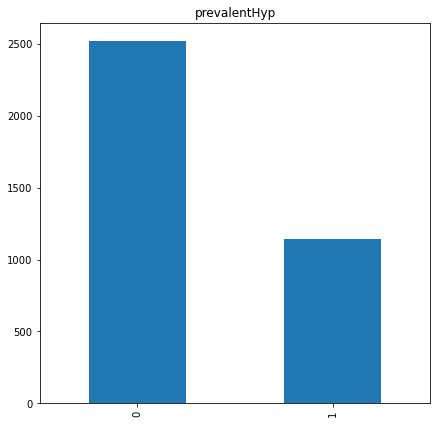

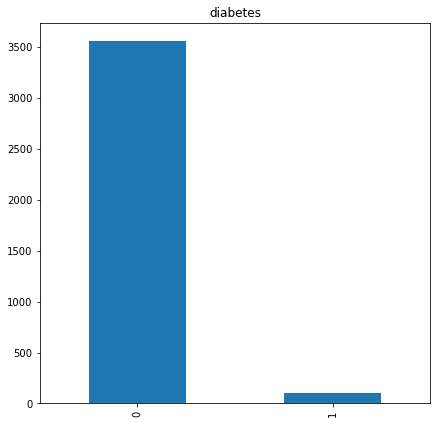

In [5]:
df_cat = df[['education', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']]

for i in df_cat.columns:
    counts = df[i].value_counts()
    fig = plt.figure(figsize = (7,7))
    ax = fig.gca()
    counts.plot.bar(ax = ax)
    ax.set_title(i)
    plt.show()

##### ** Overall, there are massive imbalances in the Predictor Variables as well. 

C:\Users\Pratyush\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Pratyush\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Pratyush\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Pratyush\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Pratyush\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Pratyush\anaconda3\lib\site-packages\seaborn\distributions.py:369:

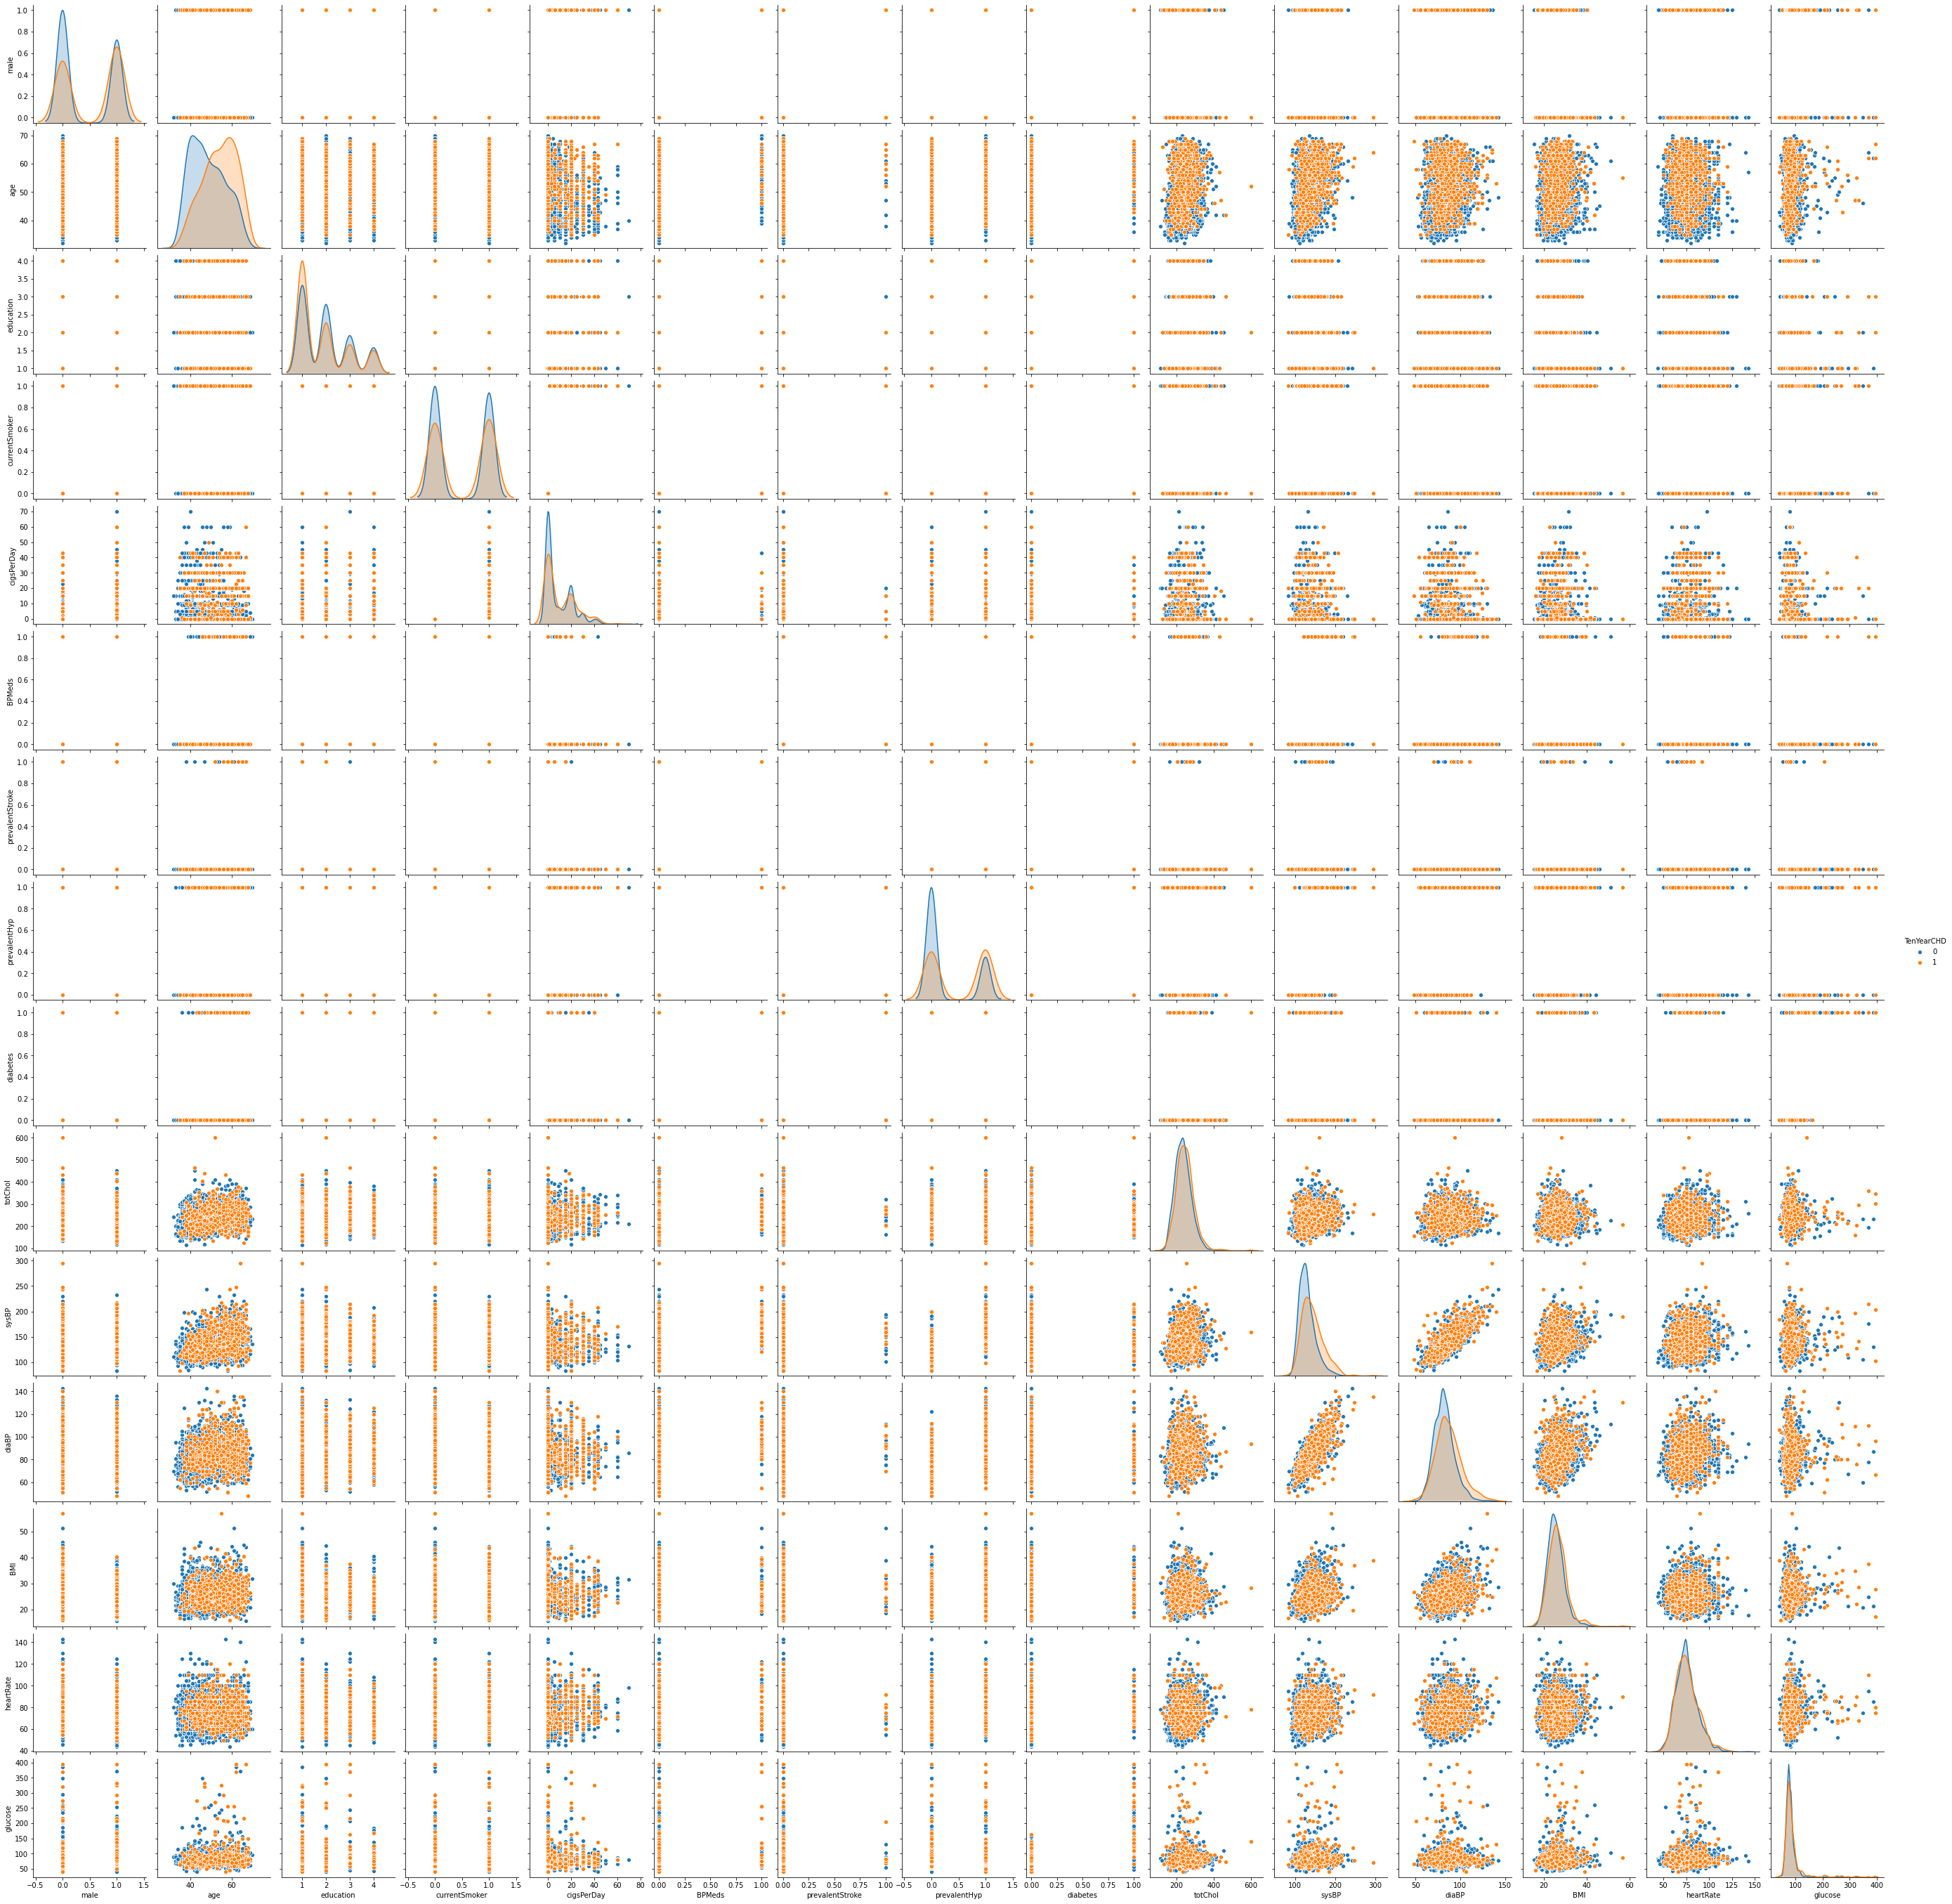

In [6]:
sns.pairplot(df, hue = 'TenYearCHD')

##### ** A pairplot will show how 0s vs 1s are distributed within the dataset. The number of overlaps are many. An SVM can solve this pretty well because of what it can do by raising the power (Polynomial) of certain data points to reduce misclassification rate

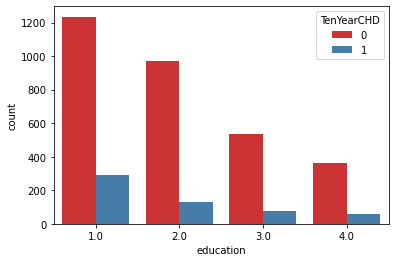

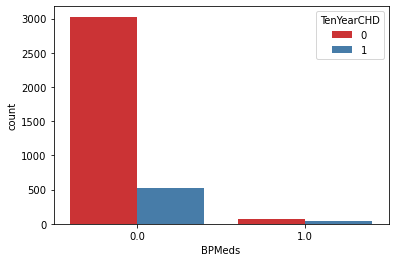

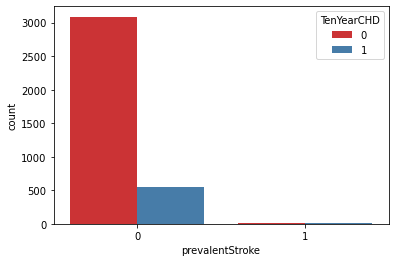

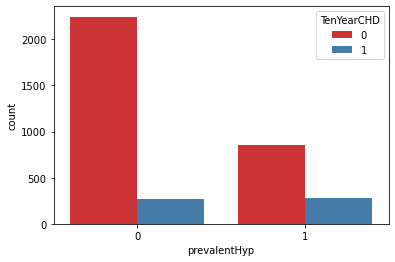

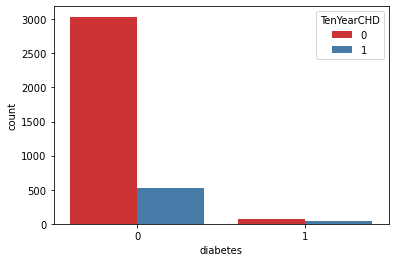

In [7]:
for i in df_cat.columns: 
    sns.countplot(df[i], hue = df['TenYearCHD'], palette = 'Set1')
    plt.show()

##### ** Again - Due to overall imbalance in data, there is no particular pattern that seems to be emerging; Only a bunch of assumptions. The majority present in each of the categorical variables also are the majority 0s

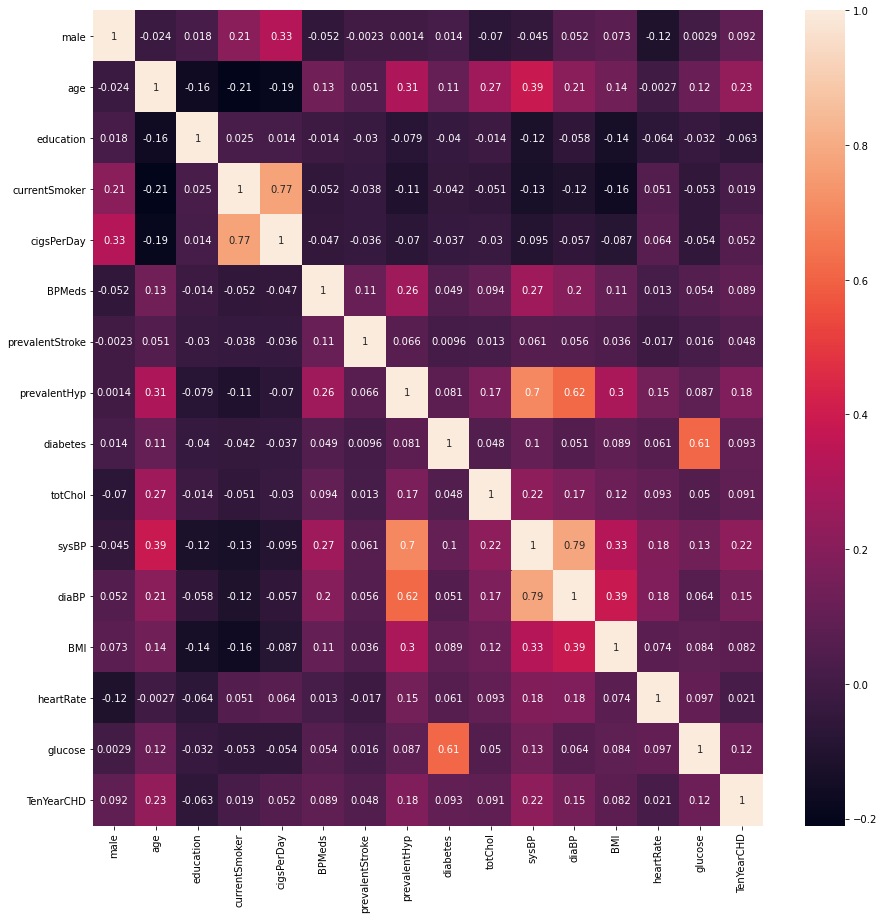

In [8]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot = True)